In [31]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt, cm as cm, colors as colors
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from glob import glob
from astropy.timeseries import LombScargle
from scipy import stats
import warnings
from TESStools import *
from tqdm.notebook import tqdm

In [2]:
fyps = pd.read_csv('fyps.csv')
cool_sgs = pd.read_csv('cool_supergiants_TESS.csv')

/Users/carina/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


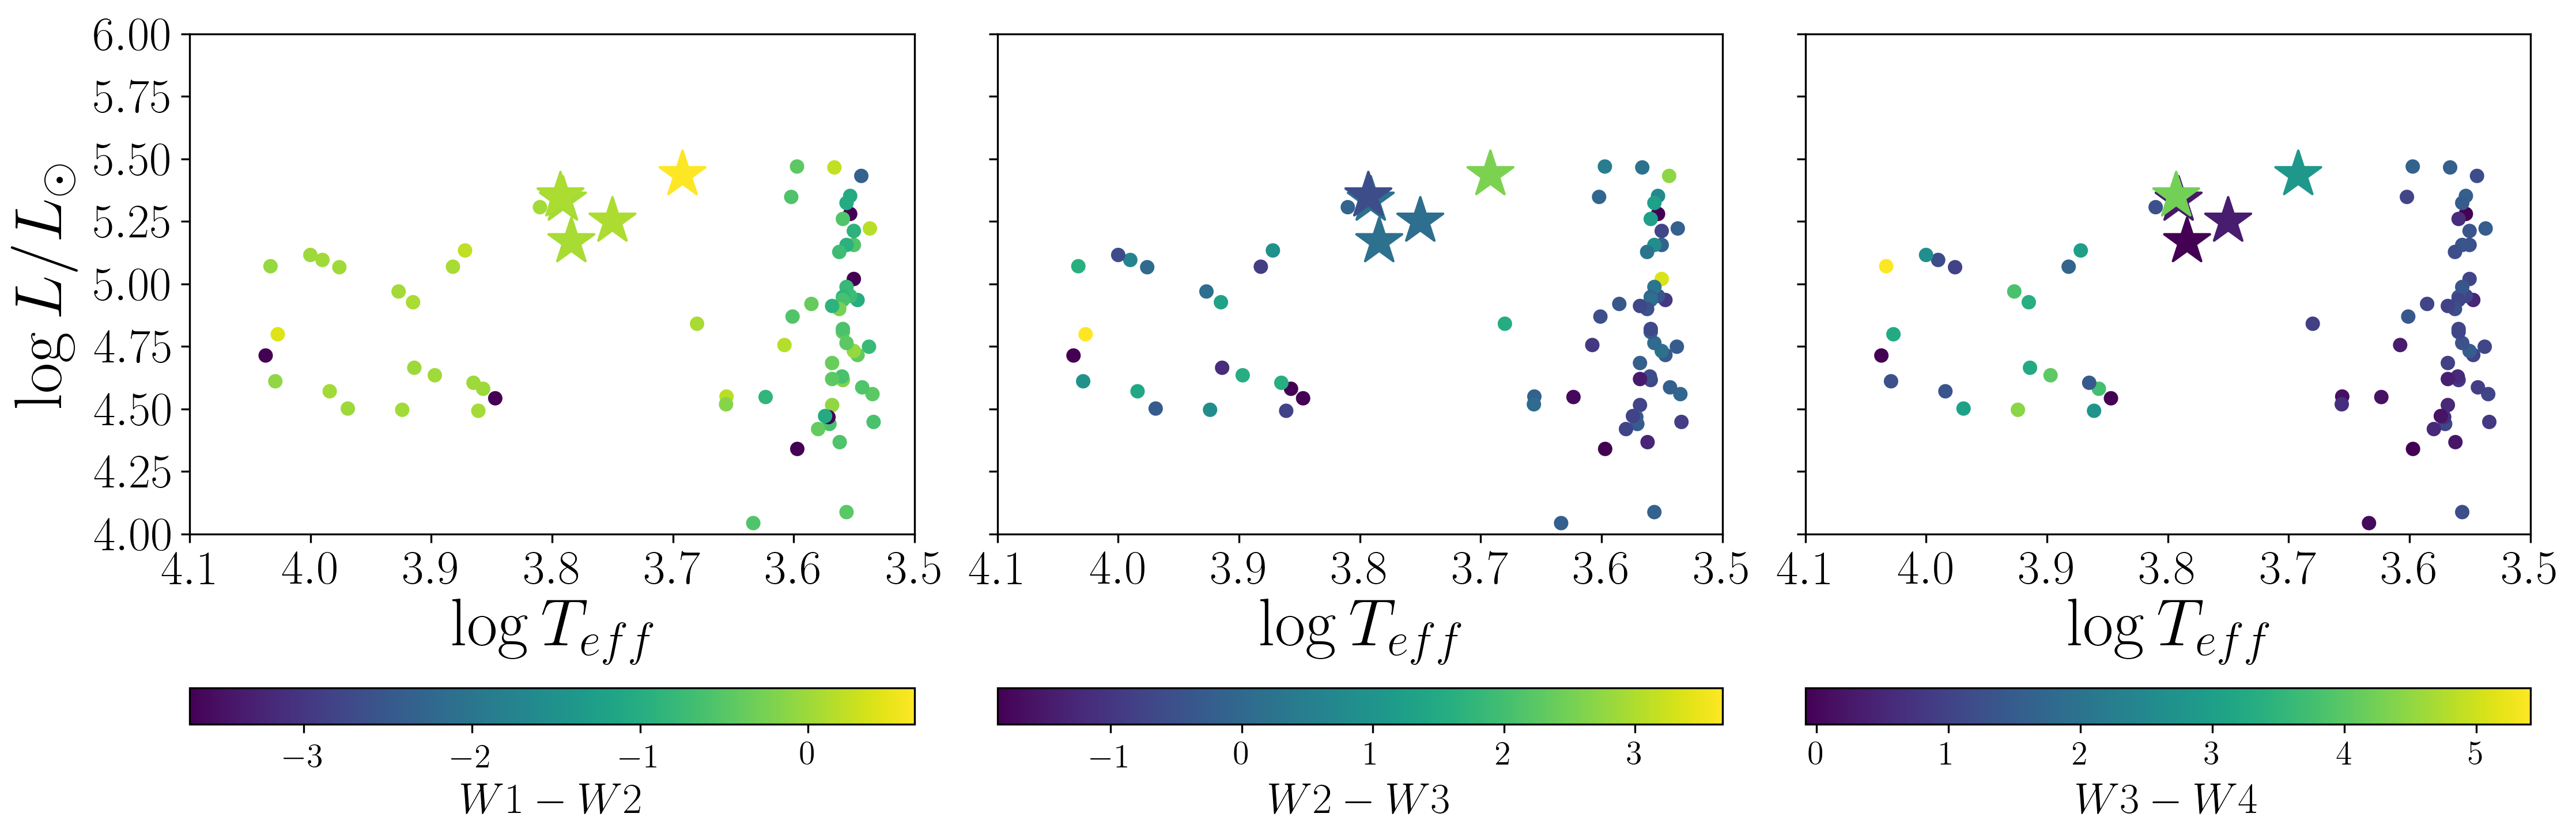

In [32]:
cmap = cm.get_cmap('viridis')
fig,axes = plt.subplots(1,3,figsize=(15,5),dpi=300,sharex=True,sharey=True)
norms = []
for i in [1,2,3]:
    color_key = cool_sgs[f'w{i}mag']-cool_sgs[f'w{i+1}mag']
    fyps_key = fyps[f'w{i}mag']-fyps[f'w{i+1}mag']
    norm = colors.Normalize(vmin=color_key.min(),vmax=color_key.max())
    norms.append(norm)
    axes[i-1].scatter(cool_sgs['teff'],cool_sgs['lum'],c=cmap(norm(color_key.values)),s=100,marker='.')

    axes[i-1].scatter(fyps['teff'],fyps['lum'],c=cmap(norm(fyps_key.values)),s=400,marker='*')
    
    
for norm,(i,ax) in zip(norms,enumerate(axes)):
    if ax == axes[0]:
        ax.set(xlabel=r'$\log T_{eff}$', ylabel=r'$\log L/L_{\odot}$',xlim=(4.1,3.5),ylim=(4,5.75))
    else:
        ax.set(xlabel=r'$\log T_{eff}$',xlim=(4.1,3.5),ylim=(4,5.75))
    ax.xaxis.label.set_size(28)
    ax.yaxis.label.set_size(28)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax.set_ylim(4,6)
    ax.set_xlim(4.1,3.5) 
    if i == 0:
        col = 27
        num = 9
    elif i==1:
        col = 54
        num = 37
    cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax,orientation='horizontal',pad=0.2)
    cbar.set_label(f'$W{i+1}-W{i+2}$',fontsize=18)
    cbar.ax.tick_params(labelsize=14)
    """cbar.set(ylabel=f'$W{i+1}-W{i+2}$')
    cbax.yaxis.label.set_size(18)
    for tick in cbax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)"""
fig.tight_layout()
plt.savefig('../plots/wise_hr.pdf')

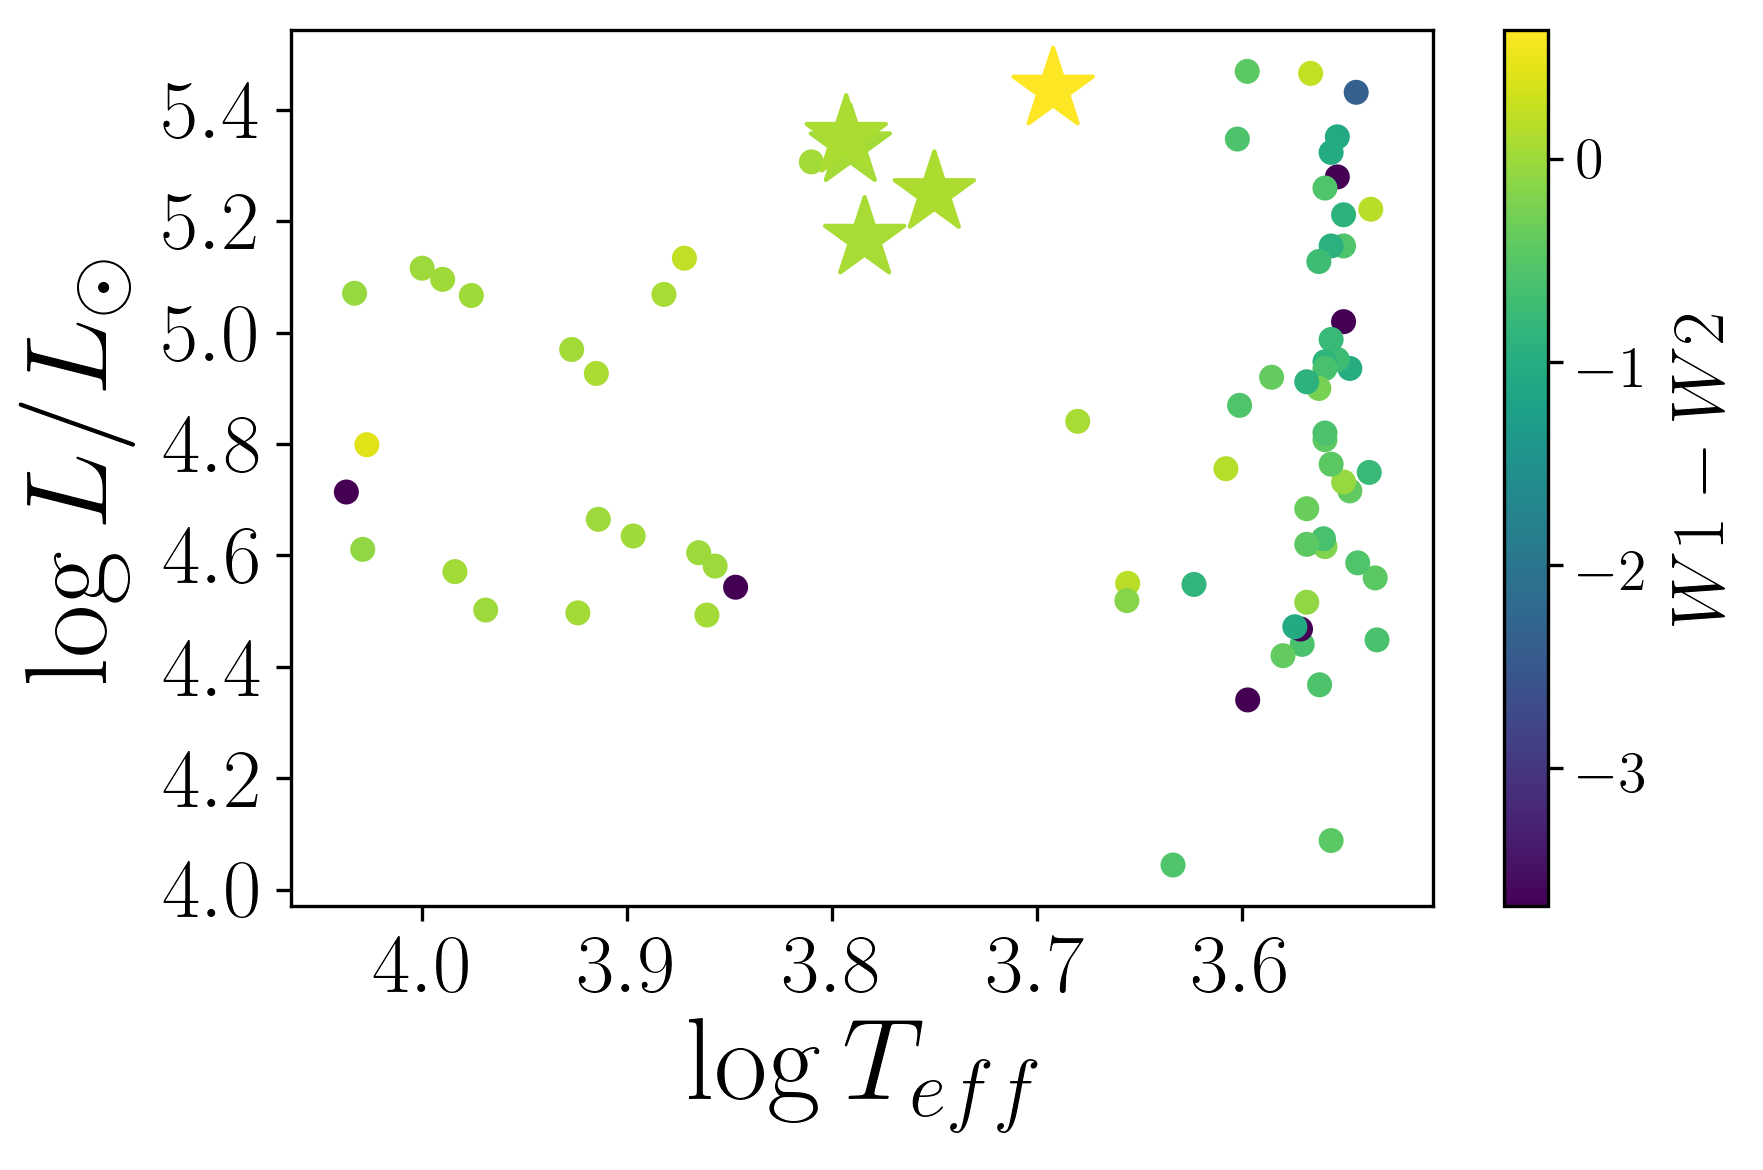

In [40]:
cmap = cm.get_cmap('viridis')
fig = plt.figure(dpi=300)
norms = []
color_key = cool_sgs[f'w1mag']-cool_sgs[f'w2mag']
fyps_key = fyps[f'w1mag']-fyps[f'w2mag']
norm = colors.Normalize(vmin=color_key.min(),vmax=color_key.max())
norms.append(norm)
plt.scatter(cool_sgs['teff'],cool_sgs['lum'],c=cmap(norm(color_key.values)),s=100,marker='.')

plt.scatter(fyps['teff'],fyps['lum'],c=cmap(norm(fyps_key.values)),s=400,marker='*')
    
ax = plt.gca()    
ax.set(xlabel=r'$\log T_{eff}$', ylabel=r'$\log L/L_{\odot}$')
ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
#ax.set_ylim(4,5.6)
#ax.set_xlim(4.1,3.5) 
ax.invert_xaxis()
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label(f'$W1-W2$',fontsize=18)
cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
plt.savefig('../plots/w1w2_hr.pdf')

# What is the critical rotation rate of HD 269110?

In [30]:
import astropy.constants as const, astropy.units as u
this_star = fyps[fyps['CommonName'] == 'HD 269110']
this_T, this_L = this_star[['teff','lum']].values[0]
T_sol = np.log10(5778)

this_R = np.power(10.0,0.5*(this_L + 4*T_sol - 4*this_T))*u.R_sun


<Quantity 445.71276784 solRad>

In [22]:
(2*np.pi/g_close['Omeg_surf'])/(86400)

14814.025701045099

In [23]:
g_close

time             1.028197e+07
mass             1.928262e+01
lg(L)            5.261145e+00
lg(Teff)         3.668353e+00
1H_surf          7.140244e-01
4He_surf         2.839494e-01
12C_surf         9.566599e-05
13C_surf         1.282668e-05
14N_surf         5.281874e-04
16O_surf         6.181385e-04
17O_surf         8.574772e-07
18O_surf         6.940597e-07
20Ne_surf        2.637386e-04
22Ne_surf        1.507204e-05
26Al_surf        2.554000e-10
Mcc/Mt           1.822000e-01
lg(Teff)_x       3.668353e+00
lg(Md)          -4.408000e+00
lg(rhoc)         3.563577e+00
lg(Tc)           8.518527e+00
1H_cen           0.000000e+00
4He_cen          9.415266e-05
12C_cen          2.045863e-01
13C_cen          9.731642e-11
14N_cen          1.677869e-17
16O_cen          7.898730e-01
17O_cen          1.740723e-16
18O_cen          5.060409e-14
20Ne_cen         2.786810e-03
22Ne_cen         5.123118e-04
26Al_cen         4.244000e-14
Omeg_surf        4.909000e-09
Omeg_cen         2.422000e-03
Rp/Req    